# Sobre o DataSet

#### This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

#### Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

###### The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
###### It is based on BeautifulSoup using Python.
###### There are 16,598 records. 2 records were dropped due to incomplete information.

In [1]:
# library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dados/vgsales.csv")
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15563,15566,Blood Bowl: Legendary Edition,PC,2010.0,Sports,Focus Home Interactive,0.00,0.01,0.0,0.00,0.02
11685,11687,Brothers in Arms: Furious 4,PS3,2012.0,Shooter,Ubisoft,0.01,0.05,0.0,0.02,0.08
6106,6108,Ice Age: Dawn of the Dinosaurs,Wii,2009.0,Action,Activision,0.11,0.14,0.0,0.03,0.28
10503,10505,Alvin and the Chipmunks: The Squeakquel,Wii,2009.0,Misc,Majesco Entertainment,0.09,0.00,0.0,0.01,0.10
6277,6279,Zumba Fitness: World Party,Wii,2013.0,Misc,Majesco Entertainment,0.14,0.11,0.0,0.03,0.27


In [3]:
df.shape[0]

16598

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Removendo valores NaN

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Ask 4 - Anos de vendas

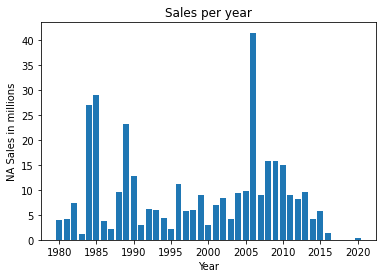

In [8]:
plt.bar(df.Year, df.NA_Sales)
plt.xlabel('Year')
plt.ylabel("NA Sales in millions")
plt.title("Sales per year")
plt.show()

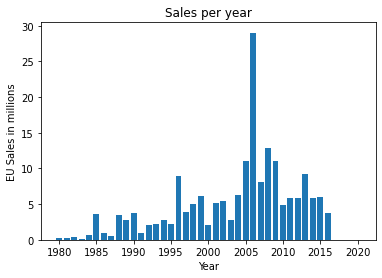

In [9]:
plt.bar(df.Year, df.EU_Sales)
plt.xlabel("Year")
plt.ylabel("EU Sales in millions")
plt.title("Sales per year")
plt.show()

Text(0.5, 1.0, 'Sales per year')

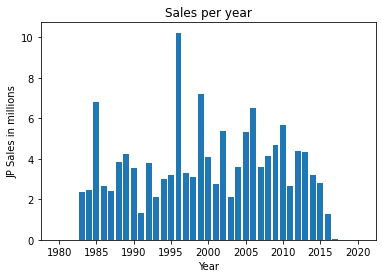

In [10]:
plt.bar(df.Year, df.JP_Sales)
plt.xlabel("Year")
plt.ylabel("JP Sales in millions")
plt.title("Sales per year")

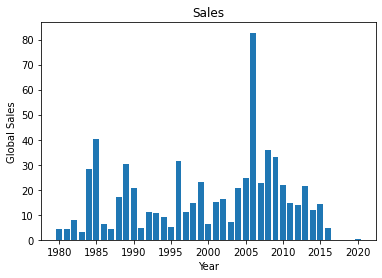

In [11]:
# Ask 5 – Anos de vendas
plt.bar(df.Year, df.Global_Sales)
plt.xlabel("Year")
plt.ylabel("Global Sales")
plt.title("Sales")
plt.show()

In [12]:
df.drop(df[df.Year > 2016].index, inplace = True)

In [13]:
df[df.Year > 2016]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [14]:
df = df.set_index('Rank')

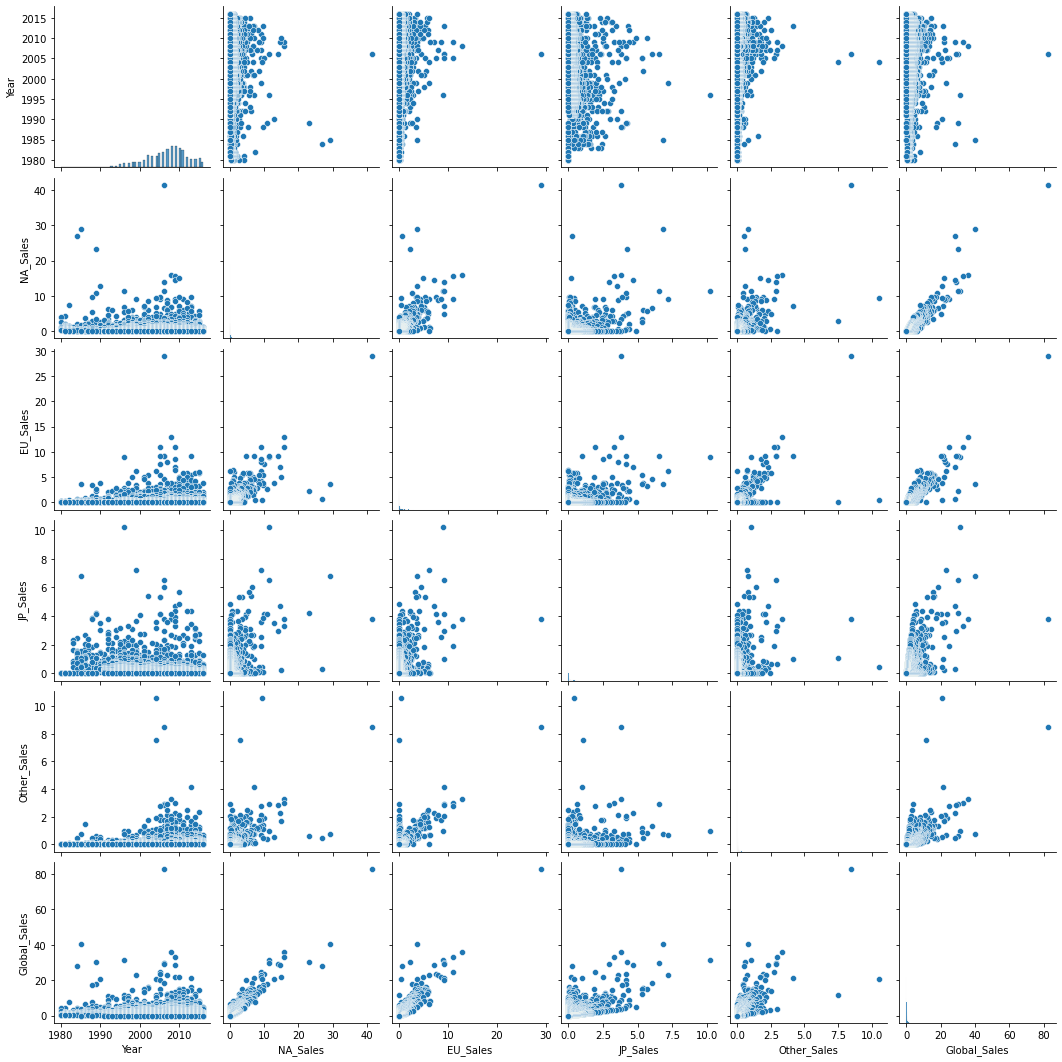

In [15]:
sns.pairplot(df)

In [16]:
df.nunique()

Name            11322
Platform           31
Year               37
Genre              12
Publisher         576
NA_Sales          408
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      621
dtype: int64

In [17]:
df.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
     

# Ask 5 -Genero por plataforma

In [18]:
top_pub = df.Publisher.value_counts()
top_pub = top_pub.head(10)
top_pub

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             630
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [19]:
top10_publisher = df.groupby('Publisher').sum().sort_values(by ='Global_Sales', ascending = False).head(10)

In [20]:
top10_publisher

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,
Nintendo,1394666.0,815.75,418.30,454.99,95.19,1784.43
Electronic Arts,2686562.0,584.22,367.38,13.98,127.63,1093.39
Activision,1938979.0,426.01,213.72,6.54,74.79,721.41
Sony Computer Entertainment,1367034.0,265.22,187.55,74.10,80.40,607.28
Ubisoft,1841174.0,252.54,163.03,7.33,50.14,473.25
Take-Two Interactive,827344.0,220.47,117.95,5.83,55.20,399.30
THQ,1428311.0,208.60,94.60,5.01,32.11,340.44
Konami Digital Entertainment,1650392.0,88.91,68.62,90.93,29.91,278.56
Sega,1263361.0,108.78,81.41,56.15,24.30,270.66


In [21]:

top5 = df.sort_values(by ="Global_Sales", ascending = False).head(5)
top5

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


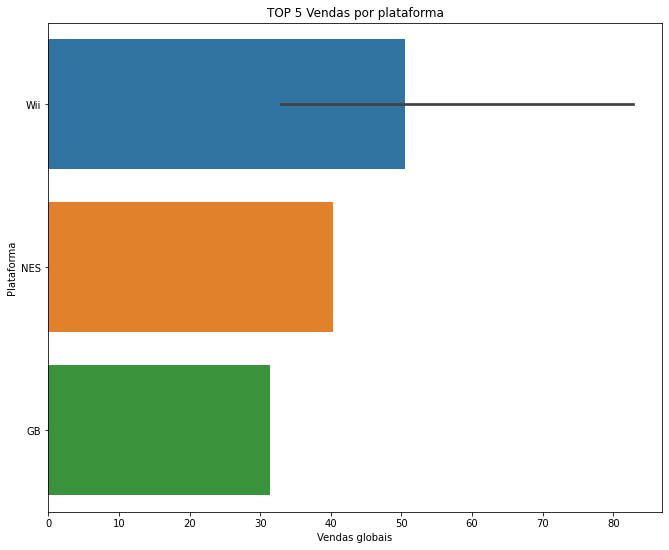

In [22]:
plt.figure (figsize = (11,9))
sns.barplot(y = top5.Platform, x = top5.Global_Sales)
plt.xlabel("Vendas globais")
plt.ylabel("Plataforma")
plt.title("TOP 5 Vendas por plataforma")
plt.show()

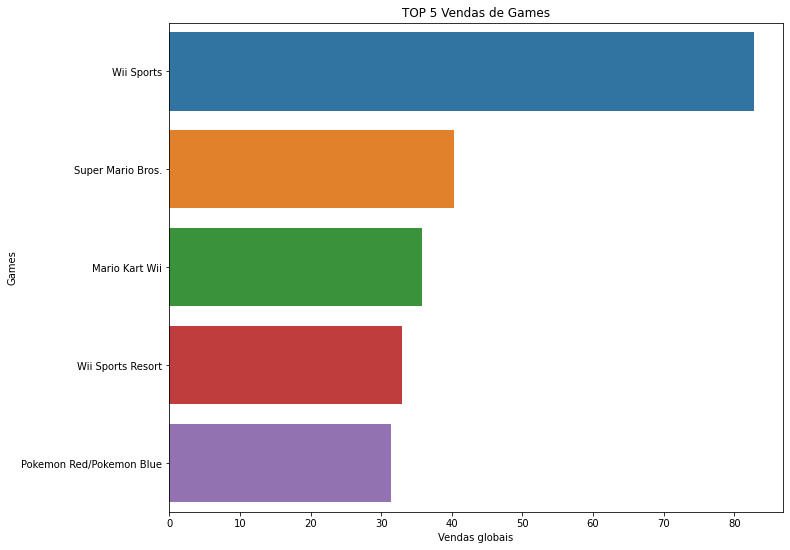

In [23]:
plt.figure (figsize = (11,9))
sns.barplot(y = top5.Name, x = top5.Global_Sales)
plt.xlabel("Vendas globais")
plt.ylabel("Games")
plt.title("TOP 5 Vendas de Games")
plt.show()

# Ask 3 – Gráfico de vendas por plataformas

In [24]:
top_platform = df.groupby("Platform").sum().sort_values(by = "Global_Sales", ascending = False).head(5)
top_platform

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,
PS2,4263750.0,572.92,332.63,137.54,190.47,1233.46
X360,2480191.0,594.33,278.00,12.30,84.67,969.60
PS3,2622109.0,388.90,340.47,79.21,140.81,949.35
Wii,2591562.0,497.37,264.35,68.28,79.20,909.81
DS,4277449.0,388.26,194.05,175.02,60.27,818.62


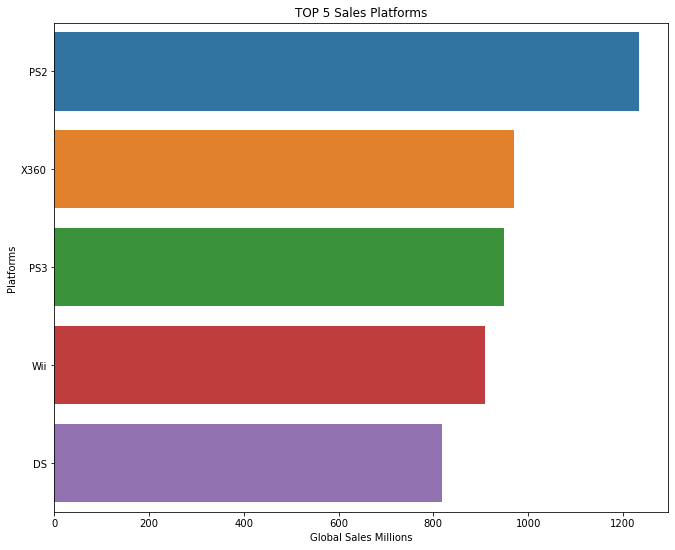

In [25]:
plt.figure(figsize = (11,9))
sns.barplot(y = top_platform.index, x = top_platform.Global_Sales)
plt.xlabel("Global Sales Millions")
plt.ylabel("Platforms")
plt.title("TOP 5 Sales Platforms")
plt.show()

In [26]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Ask 2 – O gênero mais vendido 

In [27]:
top5_genre = df.groupby("Genre").sum().sort_values(by = "Global_Sales", ascending = False).head(5)
top5_genre

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,
Action,6525686.0,861.77,516.48,158.64,184.92,1722.83
Sports,4620621.0,670.09,371.34,134.76,132.65,1309.24
Shooter,2571588.0,575.16,310.45,38.18,101.90,1026.20
Role-Playing,2946331.0,326.50,187.57,350.25,59.38,923.79
Platform,1753335.0,445.99,200.65,130.65,51.51,829.13


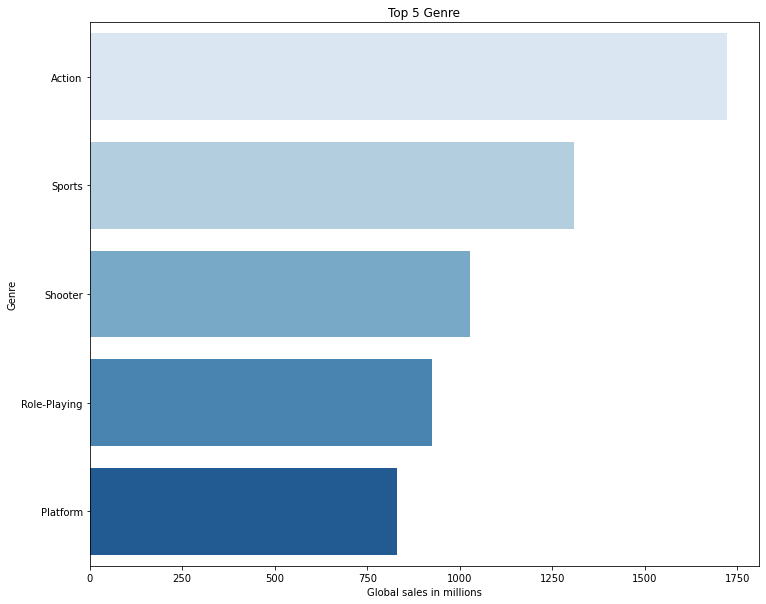

In [28]:
plt.figure(figsize = (12,10))
sns.barplot(y = top5_genre.index, x = top5_genre.Global_Sales, palette="Blues")
plt.xlabel("Global sales in millions")
plt.ylabel("Genre")
plt.title("Top 5 Genre")
plt.show()

# Ask 1 – Número de vendas TOTAL em cada país

In [29]:
lista_total = [df.NA_Sales.sum().round(2), df.EU_Sales.sum(), df.JP_Sales.sum().round(2)]

In [37]:
lista_total

[4327.38, 2406.69, 1284.22]

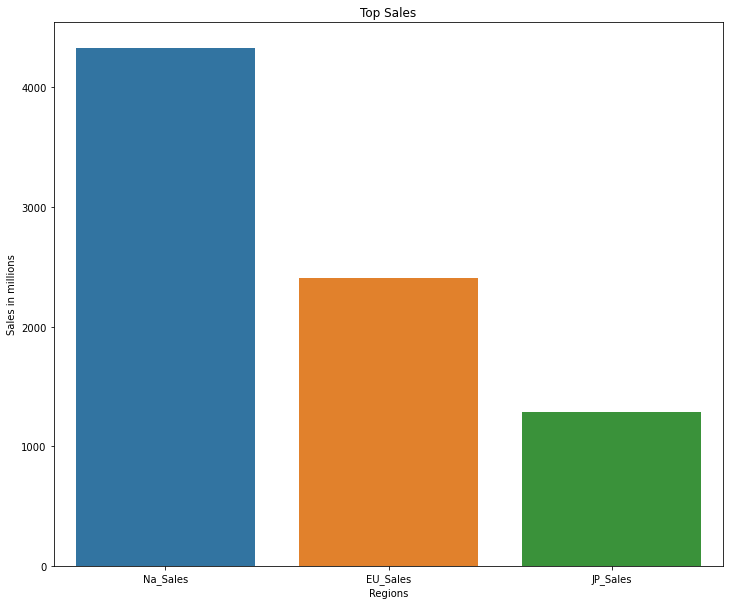

In [41]:
plt.figure(figsize = (12,10))
sns.barplot(y = lista_total, x = ['Na_Sales', 'EU_Sales', 'JP_Sales'])
plt.xlabel("Regions")
plt.ylabel("Sales in millions")
plt.title("Top Sales")
plt.show()